We use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [40]:
!wget -N https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-10-16 12:54:59--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 13.224.128.33, 13.224.128.29, 13.224.128.122, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|13.224.128.33|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ not modified on server. Omitting download.



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [41]:
import pandas as pd
import numpy  as np

import importlib

from pyearth import Earth
from pyearth import export

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable interpretation of missing values.

In [42]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', keep_default_na=False, na_values='')
df.head(10)

dateRep  day  month  year  cases  deaths countriesAndTerritories geoId  \
0 2020-10-16   16     10  2020      0       0             Afghanistan    AF   
1 2020-10-15   15     10  2020     32       1             Afghanistan    AF   
2 2020-10-14   14     10  2020     66       0             Afghanistan    AF   
3 2020-10-13   13     10  2020    129       3             Afghanistan    AF   
4 2020-10-12   12     10  2020     96       4             Afghanistan    AF   
5 2020-10-11   11     10  2020      0       0             Afghanistan    AF   
6 2020-10-10   10     10  2020     10       1             Afghanistan    AF   
7 2020-10-09    9     10  2020     77       2             Afghanistan    AF   
8 2020-10-08    8     10  2020     68       1             Afghanistan    AF   
9 2020-10-07    7     10  2020     62       2             Afghanistan    AF   

  countryterritoryCode  popData2019 continentExp  \
0                  AFG   38041757.0         Asia   
1                  AFG   38041757.0         Asia   
2                  AFG   38041757.0         Asia   
3                  AFG   38041757.0         Asia   
4                  AFG   38041757.0         Asia   
5                  AFG   38041757.0         Asia   
6                  AFG   38041757.0         Asia   
7                  AFG   38041757.0         Asia   
8                  AFG   38041757.0         Asia   
9                  AFG   38041757.0         Asia   

   Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
0                                           1.947860           
1                                           1.992547           
2                                           1.945231           
3                                           1.811168           
4                                           1.503611           
5                                           1.251257           
6                                           1.343261           
7                                           1.332746           
8                                           1.172396           
9                                           1.059362

Last check of our source dataframe.

In [43]:
df.count()

dateRep                                                       49362
day                                                           49362
month                                                         49362
year                                                          49362
cases                                                         49362
deaths                                                        49362
countriesAndTerritories                                       49362
geoId                                                         49362
countryterritoryCode                                          49298
popData2019                                                   49298
continentExp                                                  49362
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    46580
dtype: int64

We pivot to a country by column format.

In [44]:
#!wget -N https://gitlab.com/dzwietering/corona/-/raw/master/experiment/params/pf.py
import pf
importlib.reload(pf)

<module 'pf' from '/home/zwieteri/git/corona/experiment/params/pf.py'>

In [45]:
df_geo = df.pivot_table(index=pf.datcol, columns=pf.geocol, values=pf.cascol, aggfunc='sum').fillna(0)
df_geo

cases                                                          \
geoId          AD      AE     AF   AG   AI     AL      AM     AO       AR   
dateRep                                                                     
2019-12-31    0.0     0.0    0.0  0.0  0.0    0.0     0.0    0.0      0.0   
2020-01-01    0.0     0.0    0.0  0.0  0.0    0.0     0.0    0.0      0.0   
2020-01-02    0.0     0.0    0.0  0.0  0.0    0.0     0.0    0.0      0.0   
2020-01-03    0.0     0.0    0.0  0.0  0.0    0.0     0.0    0.0      0.0   
2020-01-04    0.0     0.0    0.0  0.0  0.0    0.0     0.0    0.0      0.0   
...           ...     ...    ...  ...  ...    ...     ...    ...      ...   
2020-10-12    0.0  1096.0   96.0  0.0  0.0  168.0   715.0  215.0  10310.0   
2020-10-13  299.0  1064.0  129.0  0.0  0.0  171.0  1115.0  120.0   9524.0   
2020-10-14    0.0  1315.0   66.0  0.0  0.0  182.0  1058.0  122.0  13305.0   
2020-10-15  195.0  1431.0   32.0  1.0  0.0  203.0     0.0  192.0  14932.0   
2020-10-16    0.0  1398.0    0.0  0.0  0.0  257.0  1371.0  166.0  17096.0   

                    ... deaths                                                 
geoId           AT  ...     VC   VE   VG   VI   VN   XK   YE     ZA   ZM   ZW  
dateRep             ...                                                        
2019-12-31     0.0  ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  
2020-01-01     0.0  ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  
2020-01-02     0.0  ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  
2020-01-03     0.0  ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  
2020-01-04     0.0  ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  
...            ...  ...    ...  ...  ...  ...  ...  ...  ...    ...  ...  ...  
2020-10-12  1298.0  ...    0.0  6.0  0.0  0.0  0.0  4.0  1.0  107.0  0.0  0.0  
2020-10-13   608.0  ...    0.0  7.0  0.0  0.0  0.0  2.0  0.0    0.0  9.0  0.0  
2020-10-14  1171.0  ...    0.0  6.0  0.0  0.0  0.0  1.0  1.0  248.0  0.0  0.0  
2020-10-15  1606.0  ...    0.0  4.0  0.0  0.0  0.0  1.0  0.0  123.0  0.0  1.0  
2020-10-16  1396.0  ...    0.0  6.0  0.0  1.0  0.0  1.0  0.0  158.0  1.0  0.0  

[291 rows x 422 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we add to the current range and check our latest date.

In [46]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.max() + pd.Timedelta(pf.futext))
df_geo = df_geo.reindex(new_index)
df_geo

cases                                               ... deaths  \
geoId         AD   AE   AF   AG   AI   AL   AM   AO   AR   AT  ...     VC   
2019-12-31   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
2020-01-01   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
2020-01-02   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
2020-01-03   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
2020-01-04   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
...          ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...   
2021-10-12   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    NaN   
2021-10-13   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    NaN   
2021-10-14   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    NaN   
2021-10-15   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    NaN   
2021-10-16   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    NaN   

                                                         
geoId        VE   VG   VI   VN   XK   YE   ZA   ZM   ZW  
2019-12-31  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2020-01-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2020-01-02  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2020-01-03  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2020-01-04  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  
2021-10-12  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2021-10-13  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2021-10-14  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2021-10-15  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2021-10-16  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[656 rows x 422 columns]

We need numerical data as inputs for a model, so we add a column representing the date as days since the start of the index.

In [47]:
df_geo['daynum'] = (df_geo.index - df_geo.index.min()).days
df_geo['daynum'].describe()

count    656.000000
mean     327.500000
std      189.515171
min        0.000000
25%      163.750000
50%      327.500000
75%      491.250000
max      655.000000
Name: daynum, dtype: float64

The typical progress of an outbreak seems to fit a Gumbel distribution, where the cumulative distribution is a double negative exponent: `exp(-exp(-x))`. The measures are averaged by week to smooth out reporting lags.

In [48]:
def gumpdf(x, beta, mu):
    """Return PDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(expon) * np.exp(- (np.exp(expon))) / beta)

def gumcdf(x, beta, mu):
    """Return CDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(- (np.exp(expon))))

In [79]:
#!wget -N https://gitlab.com/dzwietering/corona/-/raw/master/experiment/params/pr.py
import pr
importlib.reload(pr)

<module 'pr' from '/home/zwieteri/git/corona/experiment/params/pr.py'>

In [80]:
wave = pr.firstwav

# Initialize predicted measure, create smoothed measure and remaining cases
df_geo[(pr.pmeasure, pr.geo)] = 0
df_geo[(pr.smeasure, pr.geo)] = df_geo[pr.measure][pr.geo].loc[:].rolling(pr.sdays).mean()
df_geo[(pr.rmeasure, pr.geo)] = df_geo[pr.smeasure][pr.geo]

# Always plot smoothed and predicted measures, adding waves when found
plotlist = [(pr.smeasure, pr.geo), (pr.pmeasure, pr.geo)]

In [81]:
# Get full name and population from the original dataset
geonam = df[df[pf.geocol] == pr.geo][pf.namcol].iloc[0]
geopop = df[df[pf.geocol] == pr.geo][pf.popcol].iloc[0]

# We use 1 in a million cases, but at least 2
mincases = max(geopop / pr.popcases, pr.mincases)

In [82]:
print('Running multiple wave analysis for {} with population {:1.0f}'.format(geonam, geopop))
print('Minimum number of cases is {:1.0f}'.format(mincases))

while True:
    # Create potential wave
    curwave = pr.wmeasure + str((wave) + (10 ** pr.wavenum))[-pr.wavenum:]
    df_geo[(curwave, pr.geo)] = 0

    # Create a dataframe for projections
    df_proj = pd.DataFrame({'daynum':df_geo['daynum'],
                            'measure':df_geo[pr.rmeasure][pr.geo]})

    # Create the Gumbel division and select suitable measures
    df_proj['gumdiv'] = df_proj['measure'] / df_proj['measure'].cumsum()
    df_proj = df_proj[(df_proj['gumdiv'] > 0) & (df_proj['measure'] > mincases)]

    # Reduce to log scale and select relevant measures
    df_proj['linear'] = np.log(df_proj['gumdiv'])
    df_proj = df_proj[(df_proj['linear'] < pr.linmax) &
                      (df_proj['linear'] > pr.linmin)]

    # Do we still have data left?
    if len(df_proj) <= 1:
        print('--- no data left')
        break
    
    # Create input vectors for regression splines and build a model
    eax = df_proj['daynum'].values.reshape(-1, 1)
    eay = df_proj['linear'].values.reshape(-1, 1)
    #eamodel = Earth()
    #eamodel = Earth(minspan=0)
    eamodel = Earth(minspan=1, penalty=0, endspan=0, thresh=1e-9, check_every=1)
    eamodel.fit(eax, eay)

    # Store the results
    df_proj['earth'] = eamodel.predict(eax)

    # Find the day range
    daymin = df_proj['daynum'].min()
    daymax = df_proj['daynum'].max()

    # Find the gradient of generated regression splines
    #df_proj['gbgrad'] = np.gradient(df_proj['linear'])
    #df_proj['eagrad'] = np.gradient(df_proj['earth'])
    df_proj['gbgrad'] = df_proj['linear'] - df_proj['linear'].shift(1)
    df_proj['eagrad'] = df_proj['earth'] - df_proj['earth'].shift(1)
    
    # Knots are found when the gradient changes, including start and end
    df_proj['knot'] = ((abs(df_proj['eagrad'] - df_proj['eagrad'].shift(1)) > pr.gradmin) |
                       (df_proj['daynum'] == (daymin + 1)) |
                       (df_proj['daynum'] == daymax))

    # Starting day of each spline
    df_proj['daycount'] = df_proj.reset_index().index

    # Select the knots and find the actual number of days for each spline
    df_knot = df_proj[df_proj['knot']][['daynum', 'daycount', 'eagrad']]
    df_knot['daysdata'] = df_knot['daycount'].shift(-1) - df_knot['daycount']
    df_knot['daystime'] = df_knot['daynum'].shift(-1) - df_knot['daynum']

    # Candidate knots have a negative gradient and a minimum number of days
    df_knot['cand'] = ((df_knot['eagrad'] < -1 / pr.betamax) &
                       (df_knot['daysdata'] >= pr.datamin))

    # We want early knots with a low gradient and many days
    df_knot['since'] = df_knot['daynum'] - daymin
    df_knot['score'] = (df_knot['eagrad'] ** 2) * np.sqrt(df_knot['daysdata'] / np.sqrt(df_knot['since']))
    df_knot['choice'] = df_knot['score'] == df_knot[df_knot['cand']]['score'].max()

    # Did we find another wave?
    choice = df_knot[df_knot['choice']]
    if len(choice) == 0:
        print('--- no data for wave')
        break
    
    # Find the interval of the selected spline
    lower = choice['daynum'].values[0]
    upper = choice['daysdata'].values[0] + lower
    df_proj = df_proj[(df_proj['daynum'] >= lower) &
                      (df_proj['daynum'] <= upper)].copy()

    # Calculate slope and intercept as basis for beta and mu
    fitmod = export.export_python_function(eamodel)
    slope = (fitmod([[upper]])[0] - fitmod([[lower]])[0]) / (upper - lower)
    intercept = fitmod([[lower]])[0] - (lower * slope)
    beta = - 1 / slope
    mu = beta * (intercept + np.log(beta))

    # Apply the Gumbel PDF according to beta and mu and find the scale
    df_proj['pgumb'] = gumpdf(df_proj['daynum'], beta, mu)
    df_proj['scale'] = df_proj['measure'] / df_proj['pgumb']
    final = df_proj['scale'].mean()
    fincv = df_proj['scale'].std() / final

    # Calculate the current wave and its parameters
    df_geo[(curwave, pr.geo)] = final * gumpdf(df_geo['daynum'], beta, mu)
    peak = df_geo[df_geo[(curwave, pr.geo)] == df_geo[(curwave, pr.geo)].max()].index.min()
    start = df_geo[(df_geo[(curwave, pr.geo)] >= pr.projmin) &
                   (df_geo[(curwave, pr.geo)].index < peak)].index.min()
    floor = df_geo[(df_geo[(curwave, pr.geo)] < pr.projmin) &
                   (df_geo[(curwave, pr.geo)].index > peak)].index.min()
    print('{} beta {:6.3f} mu {:3.0f} fit {:5.3f} peak {} from {} to {} size {:1.0f}'.format(
        curwave, beta, mu, (1 - fincv) ** 2, peak.date(), start.date(), floor.date(), final))

    # Move the data from remainder to prediction
    df_geo[(pr.pmeasure, pr.geo)] += df_geo[(curwave, pr.geo)]
    df_geo[(pr.rmeasure, pr.geo)] -= df_geo[(curwave, pr.geo)]
    plotlist += [(curwave, pr.geo)]
    wave += 1

Running multiple wave analysis for Sweden with population 10230185
Minimum number of cases is 10
Wave 01 beta  7.258 mu  77 fit 0.938 peak 2020-03-17 from 2020-03-03 to 2020-04-29 size 2378
Wave 02 beta  6.705 mu  93 fit 0.937 peak 2020-04-02 from 2020-03-19 to 2020-05-16 size 4475
Wave 03 beta  7.125 mu 102 fit 0.840 peak 2020-04-11 from 2020-03-27 to 2020-05-31 size 6844
Wave 04 beta 11.077 mu 122 fit 0.869 peak 2020-05-01 from 2020-04-07 to 2020-07-22 size 16961
Wave 05 beta  4.205 mu 136 fit 0.758 peak 2020-05-15 from 2020-05-07 to 2020-06-13 size 3106
Wave 06 beta  5.554 mu 147 fit 0.832 peak 2020-05-26 from 2020-05-15 to 2020-07-04 size 4839
Wave 07 beta  6.664 mu 159 fit 0.900 peak 2020-06-07 from 2020-05-23 to 2020-07-26 size 9304
Wave 08 beta  8.372 mu 120 fit 0.790 peak 2020-04-29 from 2020-04-15 to 2020-05-31 size 387
Wave 09 beta  4.933 mu 167 fit 0.885 peak 2020-06-15 from 2020-06-04 to 2020-07-22 size 8115
Wave 10 beta  5.271 mu 176 fit 0.896 peak 2020-06-24 from 2020-06-

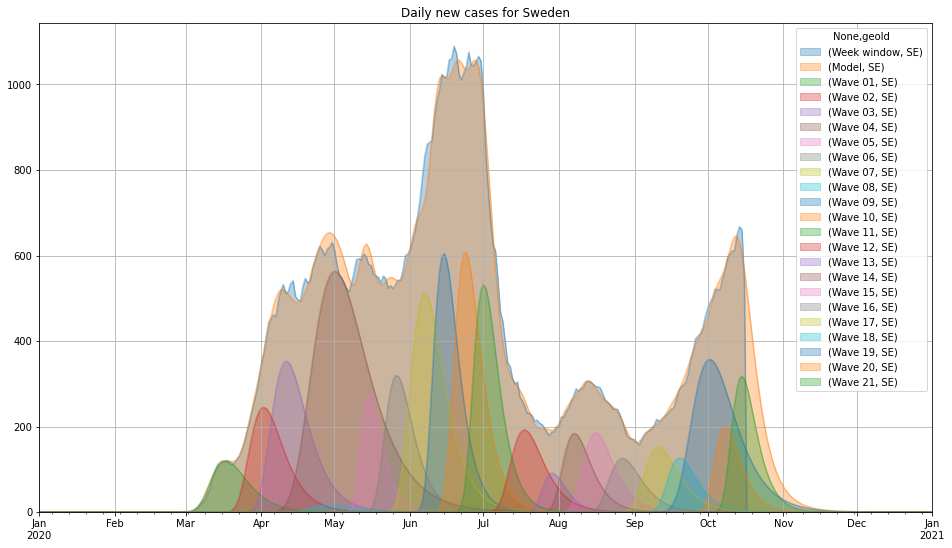

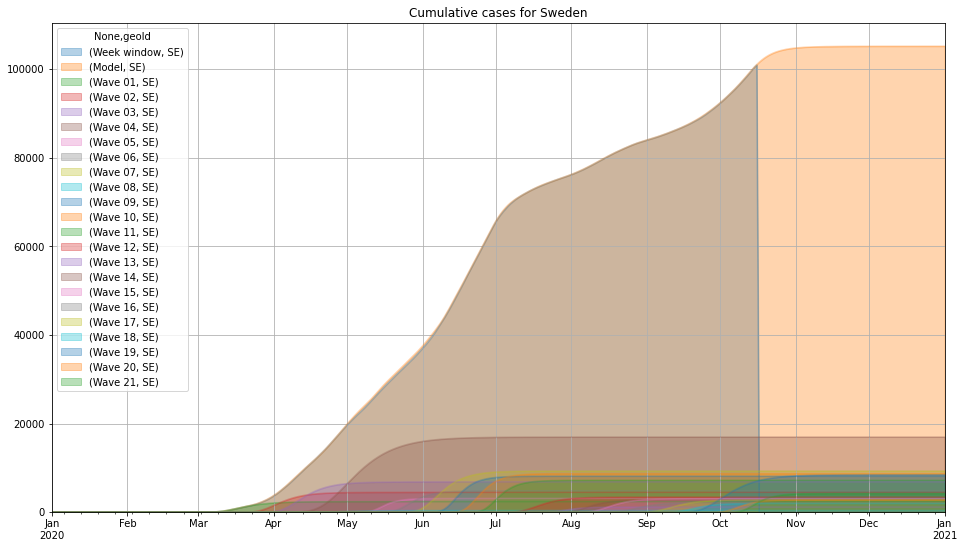

In [83]:
df_geo[plotlist].loc[pr.plotmin:pr.plotmax].plot(
    figsize=(16, 9),
    grid=True,
    kind='area',
    stacked=False,
    alpha=1/3,
    title='Daily new cases for '+geonam)
df_geo[plotlist].loc[pr.plotmin:pr.plotmax].cumsum().plot(
    figsize=(16, 9),
    grid=True,
    kind='area',
    stacked=False,
    alpha=1/3,
    title='Cumulative cases for '+geonam)

We have the estimate for the final number of cases, so the progress would be the current number of cases divided by the final number. This could end up over 100%, if we estimate that the current wave of the outbreak is over and new cases are due to relaxing of measures, increase in testing or other factors.

In [84]:
progress = df_geo[pr.measure][pr.geo].sum() / df_geo[pr.pmeasure][pr.geo].sum()
print('Currently at {:1.2f}% of {:1.0f}'.format(progress * 100, df_geo[pr.pmeasure][pr.geo].sum()))

Currently at 97.40% of 105141


The peak date is at the maximum value.

In [85]:
peak = df_geo[df_geo[(pr.pmeasure, pr.geo)] == df_geo[(pr.pmeasure, pr.geo)].max()].index.min()
print('Peak at {}'.format(peak.date()))

Peak at 2020-06-21


This date should closely match the `mu` of our distribution, in days since the start of the index.

In [86]:
print('Peak by last mu at {}'.format(df_geo.loc[df_geo['daynum'] == mu.astype(int)].index[0].date()))

Peak by last mu at 2020-10-14


The floor is defined as the first time that the number of reported cases falls below 1 in a million, which is the first time that happens *after* the peak.

In [87]:
floor = df_geo[(df_geo[(pr.pmeasure, pr.geo)] < (geopop / pr.popcases)) &
               (df_geo[(pr.pmeasure, pr.geo)].index > peak)].index.min()
print('Floor at {}'.format(floor.date()))

Floor at 2020-11-14


Similarly, we can calculate the start as the first day where the number of cases was above 1 in a million before the peak.

In [88]:
start = df_geo[(df_geo[(pr.pmeasure, pr.geo)] > (geopop / pr.popcases)) &
               (df_geo[(pr.pmeasure, pr.geo)].index < peak)].index.min()
print('Start at {}'.format(start.date()))

Start at 2020-03-06


We define the maximum delta as the day in the curve with the sharpest rise.

In [89]:
maxrise = (df_geo[(pr.pmeasure, pr.geo)] - df_geo[(pr.pmeasure, pr.geo)].shift()).max()
maxdelta = df_geo[(df_geo[(pr.pmeasure, pr.geo)] - df_geo[(pr.pmeasure, pr.geo)].shift()) == (
    maxrise)].index.min()
print('Largest rise of {:1.0f} on {}'.format(maxrise, maxdelta.date()))

Largest rise of 63 on 2020-06-10


This should match the maximum gradient of the daily data.

In [90]:
print('Maximum gradient is {:1.0f}'.format(np.gradient(df_geo[(pr.pmeasure, pr.geo)]).max()))

Maximum gradient is 61


Back to the original curve, showing the number of infected concurrently.

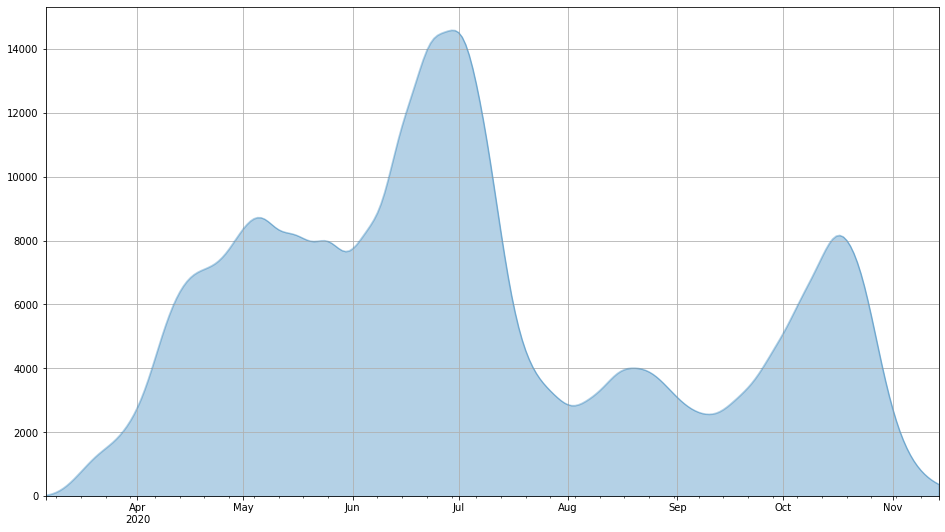

In [91]:
df_geo[pr.pmeasure][pr.geo].rolling(14).sum().loc[start:floor].plot(
    figsize=(16, 9), grid=True, kind='area', stacked=False, alpha=1/3)

The top of this curve gives the maximum number of people that are infected at the same time.

In [92]:
print('Maximum infected is {:1.0f}'.format(df_geo[pr.pmeasure][pr.geo].rolling(14).sum().max()))

Maximum infected is 14579


If we look at the difference between our actual (smoothed) value and our prediction, we can clearly see if the curve is breaking out after the floor. This can be the result of relaxing of measures and the beginning of a second wave, an increase in testing or other factors.

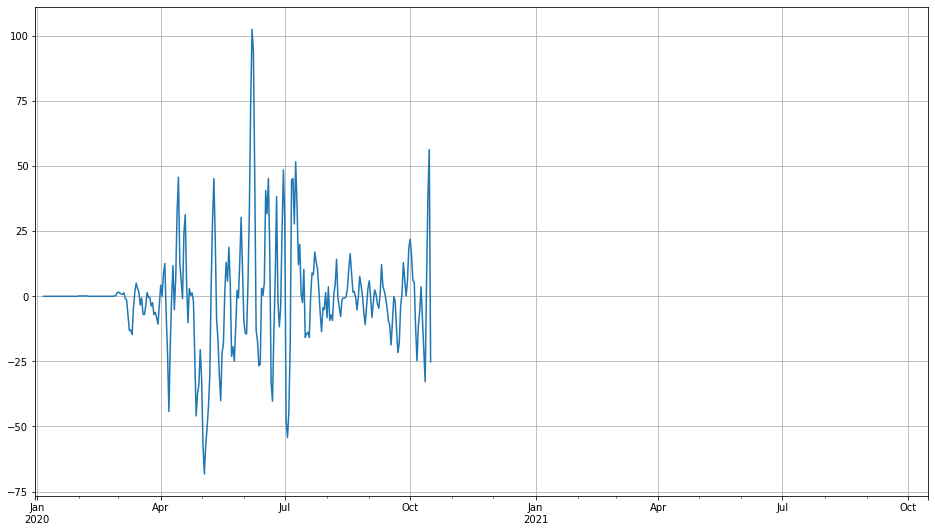

In [93]:
(df_geo[(pr.smeasure, pr.geo)] - df_geo[(pr.pmeasure, pr.geo)]).rolling(1).mean().loc[:].plot(
    figsize=(16, 9), grid=True)

Keep exploring! Stay home, wash your hands, keep your distance.